In [ ]:
!pip install --upgrade pip setuptools wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow_federated

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow_privacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade tensorflow-federated

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Download and Unzip Dataset

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1n-wc8ebopNacuTNdtGrkn7A7r7UOjBj7' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1n-wc8ebopNacuTNdtGrkn7A7r7UOjBj7" -O Dataset.zip && rm -rf /tmp/cookies.txt

--2023-06-16 17:26:01--  https://docs.google.com/uc?export=download&confirm=t&id=1n-wc8ebopNacuTNdtGrkn7A7r7UOjBj7
Resolving docs.google.com (docs.google.com)... 173.194.215.100, 173.194.215.113, 173.194.215.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a0n2h6glege69d88lufr6l9d3ishnv5g/1686936300000/14323669513596321114/*/1n-wc8ebopNacuTNdtGrkn7A7r7UOjBj7?e=download&uuid=56e89933-56e3-49ec-97c7-cb9463200ef5 [following]
--2023-06-16 17:26:01--  https://doc-0s-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a0n2h6glege69d88lufr6l9d3ishnv5g/1686936300000/14323669513596321114/*/1n-wc8ebopNacuTNdtGrkn7A7r7UOjBj7?e=download&uuid=56e89933-56e3-49ec-97c7-cb9463200ef5
Resolving doc-0s-20-docs.googleusercontent.com (doc-0s-20-docs.googleusercontent.com)... 172.217.204.

In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/walking/
  inflating: Dataset/walking/person01_walking_d1_uncomp.avi  
  inflating: Dataset/walking/person01_walking_d2_uncomp.avi  
  inflating: Dataset/walking/person01_walking_d3_uncomp.avi  
  inflating: Dataset/walking/person01_walking_d4_uncomp.avi  
  inflating: Dataset/walking/person02_walking_d1_uncomp.avi  
  inflating: Dataset/walking/person02_walking_d2_uncomp.avi  
  inflating: Dataset/walking/person02_walking_d3_uncomp.avi  
  inflating: Dataset/walking/person02_walking_d4_uncomp.avi  
  inflating: Dataset/walking/person03_walking_d1_uncomp.avi  
  inflating: Dataset/walking/person03_walking_d2_uncomp.avi  
  inflating: Dataset/walking/person03_walking_d3_uncomp.avi  
  inflating: Dataset/walking/person03_walking_d4_uncomp.avi  
  inflating: Dataset/walking/person04_walking_d1_uncomp.avi  
  inflating: Dataset/walking/person04_walking_d2_uncomp.avi  
  inflating: Dataset/walking/person04_walking_d3_uncomp.av

# Import Required Libraries

In [ ]:
!pip install pafy youtube-dl moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.3 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

# Select Randomness

In [ ]:
seed_constant = 5
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

# View the dataset

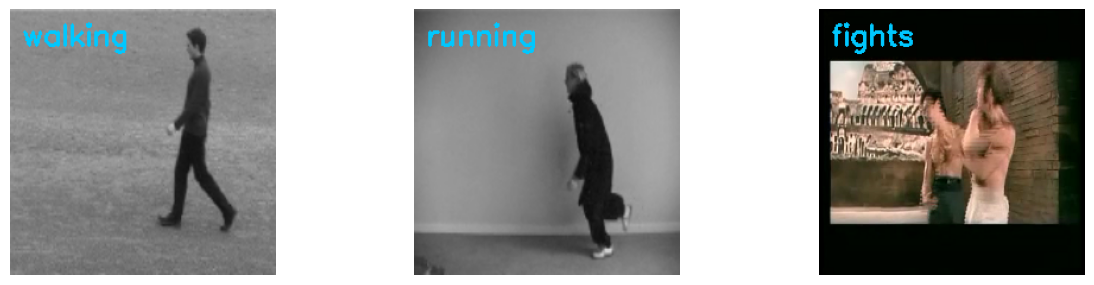

In [ ]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir('Dataset')

# Generate a list of 20 random values. The values will be between 0-50,
# where 50 is the total number of class in the dataset.
# random_range = random.sample(range(len(all_classes_names)), len(all_classes_names))

# Iterating through all the generated random values.
for counter, random_index in enumerate(range(len(all_classes_names)), 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'Dataset/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'Dataset/{selected_class_Name}/{selected_video_file_name}')
    video_reader.set(1, 25)

    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    bgr_frame = cv2.resize(bgr_frame ,(224,224))
    # Release the VideoCapture object.
    video_reader.release()

    # Convert the frame from BGR into RGB format.
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 200, 255), 2)

    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')


In [ ]:
import tensorflow_federated as tff
from tensorflow_federated import python as tffp
from tensorflow.keras.models import clone_model

# Set Dataset Variables

In [ ]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 30

# Specify the directory containing the UCF50 dataset.
DATASET_DIR = "Dataset"

# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
CLASSES_LIST = ["walking", "fights", "running"]

# Data pre-processing

In [ ]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_list = []

    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video.
        success, frame = video_reader.read()

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)

    # Release the VideoCapture object.
    video_reader.release()

    # Return the frames list.
    return frames_list

In [ ]:
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []

    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):

        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')

        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        # Iterate through all the files present in the files list.
        for file_name in files_list:

            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)

    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

In [ ]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: walking
Extracting Data of Class: fights
Extracting Data of Class: running


In [ ]:
# Assume that we have 10 devices for the sake of this example
num_devices = 50
epochs = 50
batch_size = 1

# Distribute the data across the devices
federated_data_train = []
for _ in range(num_devices):
  sample_indices = np.random.choice(len(features), size=len(features)//num_devices, replace=False)
  federated_data_train.append((features[sample_indices], labels[sample_indices]))

# Preprocess the federated data
def preprocess(dataset):
  return tf.data.Dataset.from_tensor_slices(dataset).repeat(epochs).batch(batch_size)

federated_data_train = [preprocess(data) for data in federated_data_train]

In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)

# Model Creation LRCN (Long-term Recurrent Convolutional Network)

In [ ]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu'), input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Conv2D(256, (2, 2), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()

    # Return the constructed LRCN model.
    return model


In [ ]:
# Import additional required libraries
import tensorflow_datasets as tfds
from tensorflow.keras.models import clone_model

# Define the shape and type of your input data
input_spec = (tf.TensorSpec(shape=(None, SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32),
              tf.TensorSpec(shape=(None, len(CLASSES_LIST)), dtype=np.float32))

# Define federated model creation function
def create_federated_model():
    keras_model = create_LRCN_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=input_spec,
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[tf.keras.metrics.CategoricalAccuracy()])



In [ ]:
import tensorflow_federated as tff

# Define the hyperparameters for DP
noise_multiplier = 0.4
clients_per_round = 10
total_clients = num_devices

# Define the DP aggregator
aggregation_factory = tff.learning.model_update_aggregator.dp_aggregator(
    noise_multiplier, clients_per_round)

# Create federated model
iterative_process = tff.learning.algorithms.build_unweighted_fed_avg(
        create_federated_model,
        client_optimizer_fn=lambda: tf.keras.optimizers.SGD(0.01),
        server_optimizer_fn=lambda: tf.keras.optimizers.SGD(1.0, momentum=0.9),
        model_aggregator=aggregation_factory)

# Initialize federated model
state = iterative_process.initialize()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 30, 64, 64, 32)   896       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 16, 16, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 30, 16, 16, 64)   18496     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 30, 4, 4, 64)     0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 30, 4, 4, 128)    7

In [ ]:
model = create_LRCN_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 30, 64, 64, 32)   896       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 16, 16, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 30, 16, 16, 64)   18496     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 30, 4, 4, 64)     0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 30, 4, 4, 128)    7

In [ ]:
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy_lib

# Compute the privacy budget expended
delta = 1e-5 # You might need to adjust this value depending on your dataset size
N = len(features_train)  # number of training samples
steps = epochs * N // batch_size
epsilon = compute_dp_sgd_privacy_lib.compute_dp_sgd_privacy_statement(number_of_examples=N, batch_size=batch_size, noise_multiplier=noise_multiplier, num_epochs=epochs, delta=delta)

print('Epsilon:', epsilon)

# Model Training

In [ ]:
# Train federated model
num_rounds = 6

# Convert your integer-encoded labels to one-hot encoded
labels_one_hot = tf.one_hot(labels, depth=len(CLASSES_LIST))

# Convert numpy arrays to tensors
features_tensor = tf.convert_to_tensor(features.astype('float32'))
labels_tensor = tf.convert_to_tensor(labels_one_hot)

# Distribute the data across the devices
federated_data_train = []
for _ in range(num_devices):
  sample_indices = tf.random.shuffle(tf.range(len(features)))[:len(features)//num_devices]

  sample_features = tf.gather(features_tensor, sample_indices)
  sample_labels = tf.gather(labels_tensor, sample_indices)

  # Convert numpy arrays to tf.data.Dataset, where each item is a tuple of (features, labels)
  client_data_train = tf.data.Dataset.from_tensor_slices((sample_features, sample_labels))

  # Batch the client's data
  client_data_train = client_data_train.batch(batch_size)

  federated_data_train.append(client_data_train)

for round_num in range(num_rounds):
    state, metrics = iterative_process.next(state, federated_data_train)
    print('Round: {}, Metrics: {}'.format(round_num, metrics))


Round: 0, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('categorical_accuracy', 0.35), ('loss', 1.1017965), ('num_examples', 300), ('num_batches', 300)]))])), ('aggregator', OrderedDict([('zeroing', OrderedDict([('dp_query_metrics', OrderedDict([('clip', 0.09048375)])), ('dp', ())])), ('zeroing_norm', 21.0), ('zeroed_count', 0)])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round: 1, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('categorical_accuracy', 0.43), ('loss', 1.0800498), ('num_examples', 300), ('num_batches', 300)]))])), ('aggregator', OrderedDict([('zeroing', OrderedDict([('dp_query_metrics', OrderedDict([('clip', 0.08187308)])), ('dp', ())])), ('zeroing_norm', 20.099854), ('zeroed_count', 0)])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round: 2, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('catego

# Save Model

In [ ]:
# Save your Model.
model_weights = iterative_process.get_model_weights(state)
# Clone the model used in federated training
keras_model_from_federated = create_LRCN_model()

# print(model_weights)

#assign weights from the trained federated model to the newly created LRCN Model, we transfer the weights and we will evaluate the model with the same method as before
model_weights_trainable, model_weights_non_trainable = model_weights
model_weights_combined = model_weights_trainable + model_weights_non_trainable
keras_model_from_federated.set_weights(model_weights_combined)


# Compile the Keras model
keras_model_from_federated.compile(
    optimizer="Adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Save the model
keras_model_from_federated.save("Suspicious_Human_Activity_Detection_LRCN_Model.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_9 (TimeDis  (None, 30, 64, 64, 32)   896       
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 30, 16, 16, 32)   0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 30, 16, 16, 64)   18496     
 stributed)                                                      
                                                                 
 time_distributed_12 (TimeDi  (None, 30, 4, 4, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 30, 4, 4, 128)   

# Accuracy on Test Dataset

In [ ]:
# Calculate Accuracy On Test Dataset
acc = 0
for i in range(len(features_test)):
  predicted_label = np.argmax(keras_model_from_federated.predict(np.expand_dims(features_test[i],axis =0))[0])
  actual_label = np.argmax(labels_test[i])
  if predicted_label == actual_label:
      acc += 1
acc = (acc * 100)/len(labels_test)
print("Accuracy =",acc)

1/1 [==============================] - 0s 61ms/step
Accuracy = 68.0


In [ ]:
def predict_single_action(video_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform single action recognition prediction on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Declare a list to store video frames we will extract.
    frames_list = []

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Get the number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)

    # Iterating the number of times equal to the fixed length of sequence.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Read a frame.
        success, frame = video_reader.read()

        # Check if frame is not read properly then break the loop.
        if not success:
            break

        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        normalized_frame = resized_frame / 255

        # Appending the pre-processed frame into the frames list
        frames_list.append(normalized_frame)

    # Passing the  pre-processed frames to the model and get the predicted probabilities.
    predicted_labels_probabilities = keras_model_from_federated.predict(np.expand_dims(frames_list, axis = 0))[0]

    # Get the index of class with highest probability.
    predicted_label = np.argmax(predicted_labels_probabilities)

    # Get the class name using the retrieved index.
    predicted_class_name = CLASSES_LIST[predicted_label]

    # Display the predicted action along with the prediction confidence.
    print(f'Action Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')

    # Release the VideoCapture object.
    video_reader.release()

In [ ]:
predict_single_action("Predict/fight.avi",SEQUENCE_LENGTH)

1/1 [==============================] - 0s 54ms/step
Action Predicted: fights
Confidence: 0.9286046624183655


In [ ]:
predict_single_action("Predict/running.avi",SEQUENCE_LENGTH)

1/1 [==============================] - 0s 70ms/step
Action Predicted: running
Confidence: 0.5173791646957397


In [ ]:
predict_single_action("Predict/walking.avi",SEQUENCE_LENGTH)

1/1 [==============================] - 0s 59ms/step
Action Predicted: running
Confidence: 0.5114644169807434
